[6, 1, 212, 2, 108, 2, 581, 10, 1, 2681, 115, 3, 1829, 17, 49, 9, 274, 2, 30, 1, 1, 3, 65, 47, 2, 2, 127, 2, 1269, 21, 1392, 10, 12, 1, 1, 211, 9, 1]


C:\Users\iwona\AppData\Local\Temp/ipykernel_23764/2103094509.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dzieci['ilosc'] = 1
C:\Users\iwona\AppData\Local\Temp/ipykernel_23764/2103094509.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unikatowe_wartosci['suma'][k] = dzieci_grup_result_grup_lista[j]
C:\Users\iwona\AppData\Local\Temp/ipykernel_23764/2103094509.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

Text(0, 0.5, '[%] odwolanych rezerwacji')

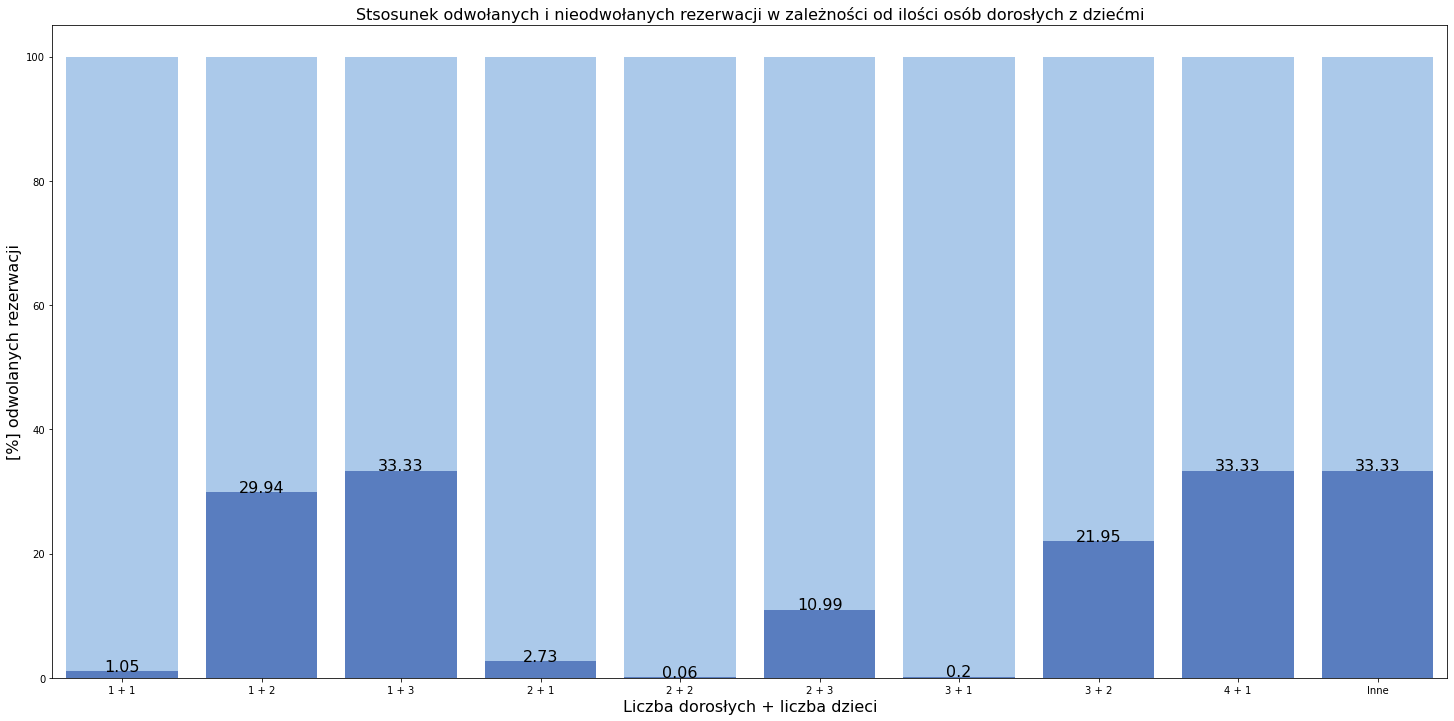

In [56]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

tabela_glowna = pd.read_csv('hotel_bookings_dane.csv')
tabela_glowna
# tabela_glowna.isna().any()

tabela_wiek = tabela_glowna[['is_canceled', 'adults', 'children', 'babies']].fillna(0.0)
tabela_wiek
# tabela_wiek.isna().any()

dzieci = tabela_wiek[(tabela_wiek['adults']!=0) & ((tabela_wiek['children']!=0) | (tabela_wiek['babies']!=0))]
dzieci
dzieci['ilosc'] = 1
dzieci_grup = dzieci.groupby(by=['is_canceled','adults', 'children', 'babies'])#stad widac ze powyzej 4 dorosli przyjjezdali zawsze z diecmi

W = []
ilosc_dzieci = []
ilosci_niemownat = []
status_odwoalania = []
ilosc_doroslych = []


for key, value in dzieci_grup:
    key = list(key)
    W.append(key)

for m, n, o, p in W:
    ilosc_dzieci.append(o)
    ilosci_niemownat.append(p)
    status_odwoalania.append(m)
    ilosc_doroslych.append(n)


rezerwacje = dzieci_grup.count().values.tolist()
rezerwacje
ilosc_rezerwacji = []
for element in rezerwacje:
    for el in element:
        ilosc_rezerwacji.append(el)

print(ilosc_rezerwacji)

wykres_2={
    'status_odwolania':status_odwoalania,
    'ilosc_doroslych':ilosc_doroslych,
    'ilosc_dzieci':ilosc_dzieci,
    'ilosci_niemownat':ilosci_niemownat,
    'ilosc_rezerwacji':ilosc_rezerwacji
    }
wykres_2
wykres_2_df = pd.DataFrame(wykres_2)
wykres_2_df['calkowita_ilosc_dzieci'] = wykres_2_df['ilosc_dzieci'] + wykres_2_df['ilosci_niemownat']
wykres_2_df


dzieci_grup_odwolane = wykres_2_df[
    wykres_2_df['status_odwolania']==1][['status_odwolania','ilosc_doroslych','calkowita_ilosc_dzieci','ilosc_rezerwacji']]
dzieci_grup_odwolane
dzieci_grup_nieodwolane = wykres_2_df[wykres_2_df[
    'status_odwolania']==0][['status_odwolania','ilosc_doroslych','calkowita_ilosc_dzieci','ilosc_rezerwacji']]
dzieci_grup_nieodwolane

dzieci_grup_result = pd.concat([dzieci_grup_odwolane, dzieci_grup_nieodwolane]).reset_index(drop=True)
dzieci_grup_result
dzieci_grup_result_grup = dzieci_grup_result.groupby(by = ['ilosc_doroslych','calkowita_ilosc_dzieci']).sum()['ilosc_rezerwacji']
dzieci_grup_result_grup
dzieci_grup_result_grup_df = pd.DataFrame(dzieci_grup_result_grup)
dzieci_grup_result_grup_df
dzieci_grup_result_grup_lista = dzieci_grup_result.groupby(
    by = ['ilosc_doroslych','calkowita_ilosc_dzieci']).sum()['ilosc_rezerwacji'].values.tolist()

unikatowe_wartosci = dzieci_grup_result.drop_duplicates(subset=['ilosc_doroslych','calkowita_ilosc_dzieci']).reset_index(drop=True)
unikatowe_wartosci

unikatowe_wartosci['suma'] = None
lista_krotek =[]
for i in range(len(unikatowe_wartosci['status_odwolania'])):
    f1 = unikatowe_wartosci['ilosc_doroslych'][i]
    f2 = unikatowe_wartosci['calkowita_ilosc_dzieci'][i]
    krotka = f1, f2
    lista_krotek.append(krotka)

for el in lista_krotek:
    for element in dzieci_grup_result_grup_df.index.tolist():
        if el == element:
            j = dzieci_grup_result_grup_df.index.tolist().index(element)
            k = lista_krotek.index(el)
            unikatowe_wartosci['suma'][k] = dzieci_grup_result_grup_lista[j]


unikatowe_wartosci

# y= dzieci_grup_result.duplicated(subset=['ilosc_doroslych','calkowita_ilosc_dzieci'])
# y

unikatowe_wartosci
unikatowe_wartosci['kolumna_x']=None
for i in range(len(unikatowe_wartosci['status_odwolania'])):
    f1 = unikatowe_wartosci['ilosc_doroslych'][i]
    f2 = int(unikatowe_wartosci['calkowita_ilosc_dzieci'][i])
    unikatowe_wartosci['kolumna_x'][i]=f'{f1} + {f2}'
    
unikatowe_wartosci['y1'] = 100

unikatowe_wartosci

tab_1 = unikatowe_wartosci[(unikatowe_wartosci['ilosc_doroslych'] + unikatowe_wartosci['calkowita_ilosc_dzieci']) < 6].reset_index(drop=True)
tab_1
tab_2 = unikatowe_wartosci[(unikatowe_wartosci['ilosc_doroslych'] + unikatowe_wartosci['calkowita_ilosc_dzieci']) > 5].reset_index(drop=True)
tab_2['kolumna_x'] = 'Inne'
tab_2['suma'] = 3
tab_2

unikatowe_wartosci2 = pd.concat([tab_1, tab_2]).reset_index(drop=True)
unikatowe_wartosci2 = unikatowe_wartosci2[unikatowe_wartosci2['status_odwolania'] != 0]

unikatowe_wartosci2['procent'] = None
for i in range(len(unikatowe_wartosci2['status_odwolania'])):
    if unikatowe_wartosci2['status_odwolania'][i] == 0:
        unikatowe_wartosci2['procent'][i] = 0
    else:
        unikatowe_wartosci2['procent']= (unikatowe_wartosci2['ilosc_rezerwacji']/unikatowe_wartosci2['suma'])*100

x = unikatowe_wartosci2["kolumna_x"].values.tolist()
y = unikatowe_wartosci2['procent'].values.tolist()
def add_value_label(x_list,y_list):
    for i in range(len(x_list)):
        plt.text(i, round(y_list[i], 2), round(y_list[i], 2), ha="center",fontsize=16)

f, ax = plt.subplots(figsize=(25, 12))

sns.set_color_codes("pastel")
sns.barplot(x="kolumna_x", y='y1', data=unikatowe_wartosci2, color="b")

sns.set_color_codes("muted")
sns.barplot(x="kolumna_x", y='procent', data=unikatowe_wartosci2, color="b")
add_value_label(x, y)

plt.title("Stsosunek odwołanych i nieodwołanych rezerwacji w zależności od ilości osób dorosłych z dziećmi", fontsize=16)
plt.xlabel("Liczba dorosłych + liczba dzieci", fontsize=16)
plt.ylabel("[%] odwolanych rezerwacji", fontsize=16)
    